In [22]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import APFcommonstuff as APF


In [26]:
# importantly, this correlation analysis must have cleaned data to be useful. 
data = pandas.read_csv('final_data_cleaned_fixed_starIDs.csv')

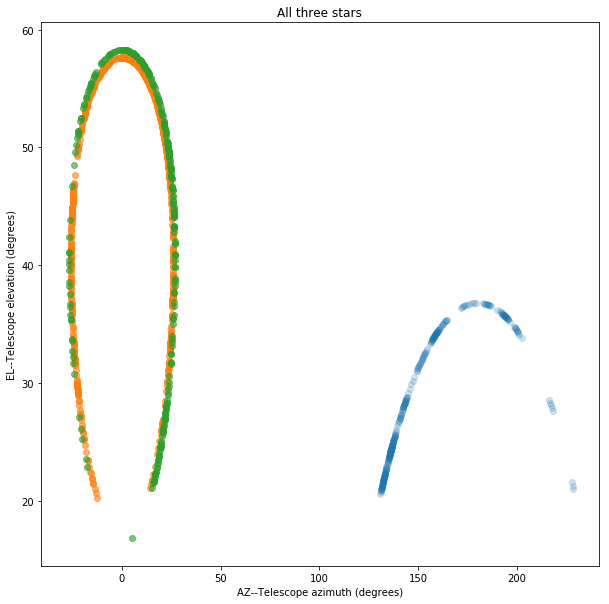

In [28]:
def plot_az_el(data, s=None, xylim=None):  
    fig = plt.figure(figsize=(10, 10))
    if not s:
        s = 40
        
    plt.title('All three stars')
    #plt.scatter(data[xname], data[yname], s=40, alpha=0.1)
    plt.scatter(data.loc[data['starID_corrected'] == 'HD10700_APF.vels'].AZ, 
              data.loc[data['starID_corrected'] == 'HD10700_APF.vels'].EL,
               alpha = 0.2)
    plt.scatter(data.loc[data['starID_corrected'] == 'HD185144_APF.vels'].AZ, 
              data.loc[data['starID_corrected'] == 'HD185144_APF.vels'].EL,
               alpha = 0.6)
    plt.scatter(data.loc[data['starID_corrected'] == 'HD9407_APF.vels'].AZ, 
              data.loc[data['starID_corrected'] == 'HD9407_APF.vels'].EL,
               alpha = 0.6)
    plt.xlabel(APF.shortname_and_units('AZ'))
    plt.ylabel(APF.shortname_and_units('EL'))
    if xylim:
        plt.xlim(xylim[0])
        plt.ylim(xylim[1])
                
plot_az_el(data)

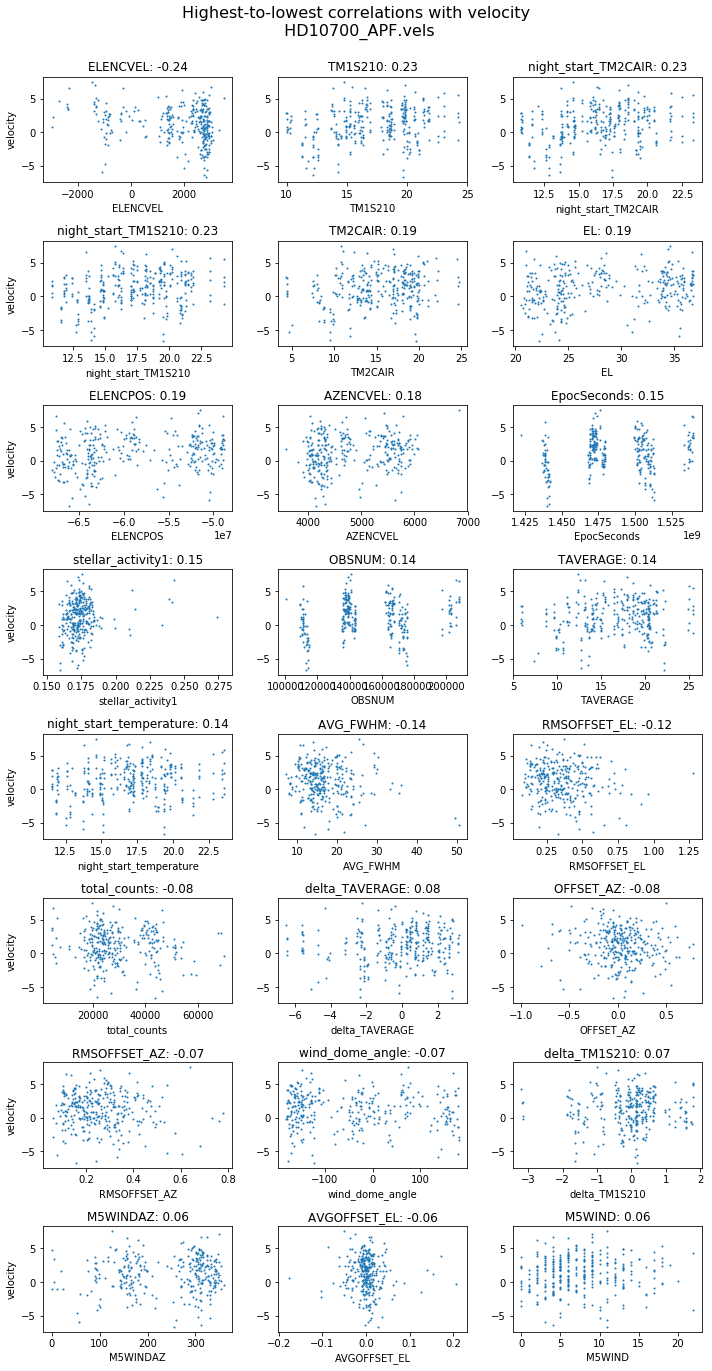

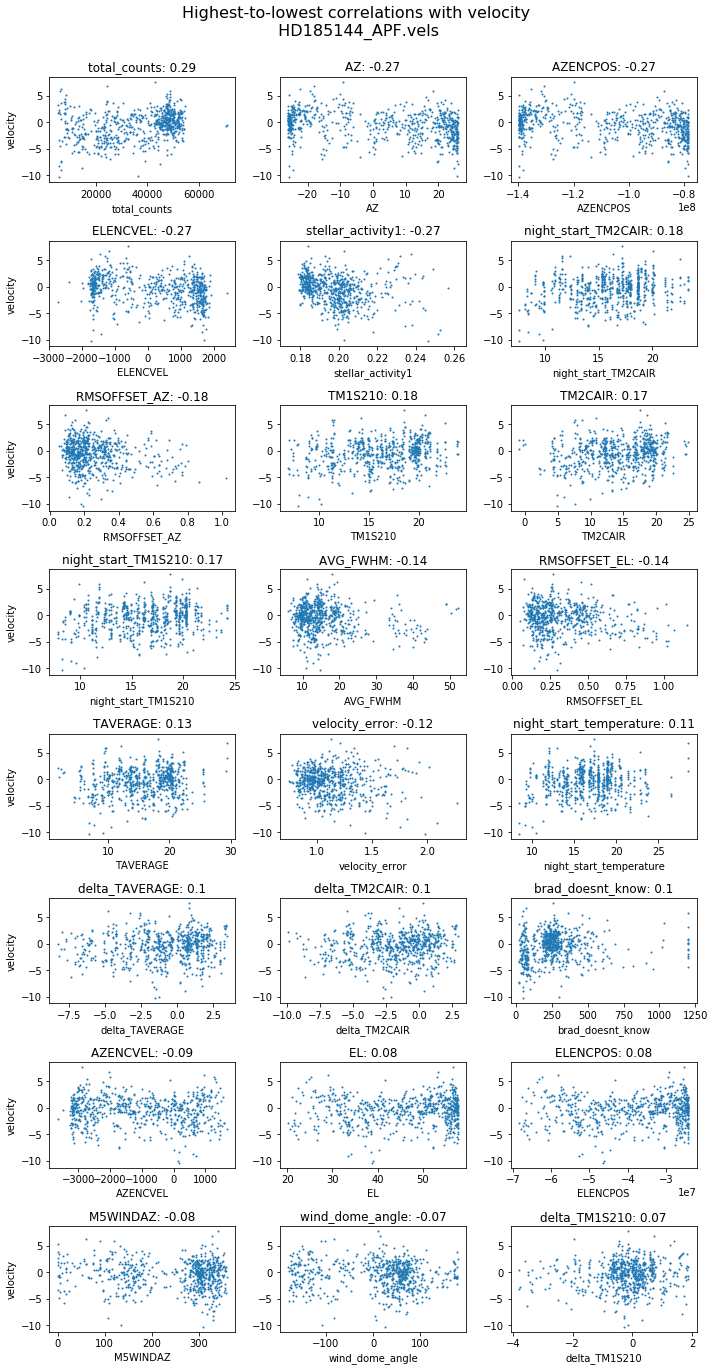

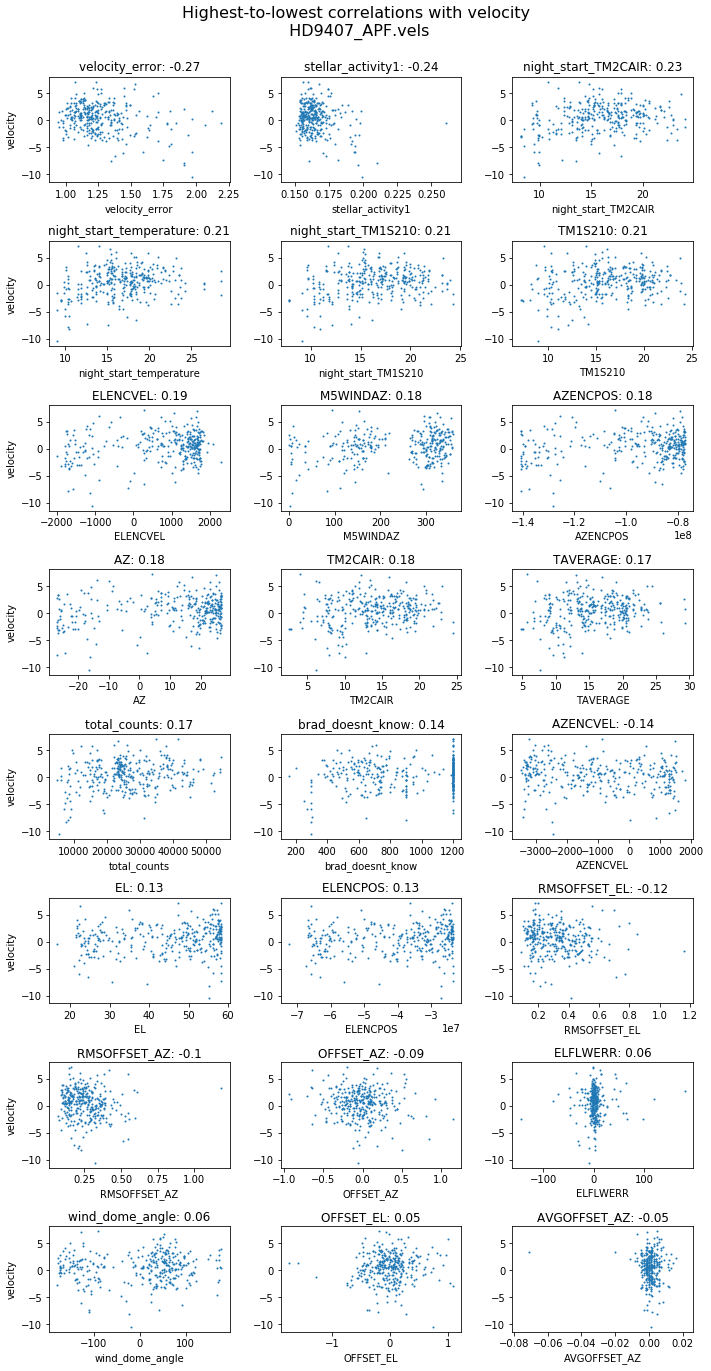

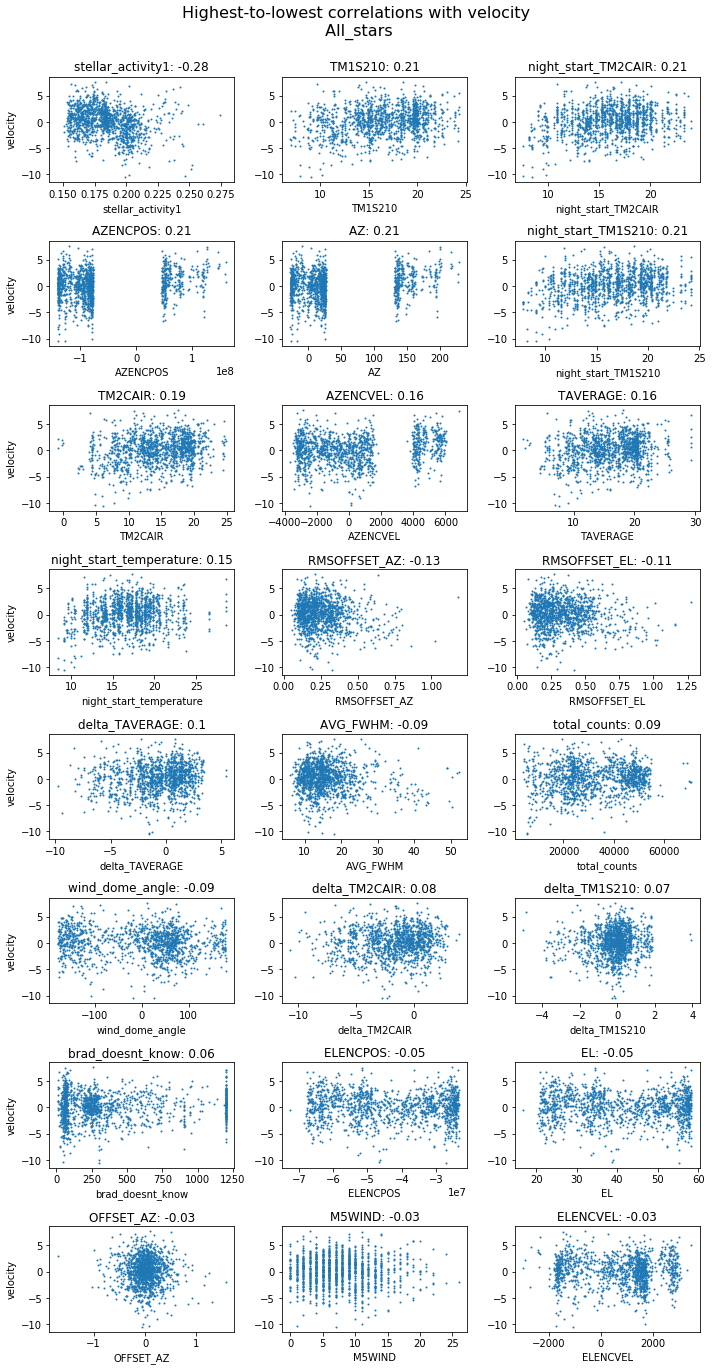

In [29]:
def make_correlations_exploring_plot(data, starID=None, limit=24):
    rows = int(np.floor(limit/3))
    fig, axarr = plt.subplots(rows, 3)

    if starID:
        masked_data = data.loc[data['starID_corrected'] == starID]
    else:
        masked_data = data
        starID = 'All_stars'
    
    
    correlations = masked_data.corr()['velocity']
    sorted_correlations_list = np.abs(correlations).sort_values(0, ascending=False)[3:-2]
    index = sorted_correlations_list.index
    
    sorted_correlations_list = sorted_correlations_list[:rows*3]

    for i, (name, correlation) in enumerate(sorted_correlations_list.iteritems()):
        row = int(np.floor(i/3)); col = i%3
        ax = axarr[row, col]
        ax.scatter(masked_data[name], masked_data['velocity'], s=1)
        if col == 0:
            ax.set_ylabel('velocity')
        #np.coerrcoeff
        #p = np.polyfit(data[name], data['velocity'], deg=1)
        #print(name, p)
        #x = np.arange(data[name].min(), data[name].max(), 100)
        #ax.plot(x, np.polyval(p, x), c='r')
        ax.set_xlabel(name)
        ax.set_title('{}: {}'.format(name, round(correlations[name], 2)))
        ax.autoscale()
    
    fig.set_figheight(20)
    fig.set_figwidth(10)
    fig.suptitle('Highest-to-lowest correlations with velocity\n {}'.format(starID),
                 size=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig('plots/{}_velocity_correlations.png'.format(starID))

for starID in APF.stars['starID']:
    make_correlations_exploring_plot(data, starID = starID)
make_correlations_exploring_plot(data)